# Sentence Final Particles

The analysis of sentence final particles (SFP) relies heavily on authentic spoken data. This workbook will show you several ways to extract SFP examples using pycantonese, and to calculate statistics for SFP data.

## Pre-requisites
- Basic Python syntax ([tutorial](https://github.com/jacksonllee/pycantonese/blob/main/docs/tutorials/lee-python-2021-april.ipynb))
- Basic pycantonese operations ([this tutorial](https://github.com/jacksonllee/pycantonese/blob/main/docs/tutorials/lee-pycantonese-2021-05-16.ipynb))

## Goals
By the end of this tutorial, you should be able to:- 
1. Create a frequent list for Cantonese SFPs
1. Draw bar charts showing SFP distribution
1. Extract SFP examples using PyCantonese which satisfy certain constraints (e.g. sentence length, not used with other SFPs)

With techniques introduced in this tutorial, you can also try work out solutions to other problems.

## Installation
Run the cell below to install pycantonese and seaborn

In [2]:
!pip install pycantonese==3.3.0

     |████████████████████████████████| 3.9MB 3.9MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 


In [3]:
import pycantonese

corpus1 = pycantonese.hkcancor()
words_by_utterances = corpus1.words(by_utterances=True)
words_by_utterances[:2]  # a list of two lists


[['喂', '遲', '啲', '去', '唔', '去', '旅行', '啊', '?'],
 ['你', '老公', '有冇', '平', '機票', '啊', '?']]

## Distribution of SFPs in HKCanCor

First we would like to find out which SFPs are more frequently used. The concept is to extract all instances of SFPs from HKCanCor, and then calculate the frequency of each item.

In [4]:
all_words = corpus1.words()
len(all_words)

153654

In [5]:
all_sfp = corpus1.search(pos='Y')
len(all_sfp)

17542

In [6]:
len(all_sfp)/len(all_words)

0.11416559282543898

In [7]:
# This line shows you the first 10 instances of SFP in the dataset.
all_sfp[:10]

[Token(word='啊', pos='Y', jyutping='aa3', mor=None, gra=None),
 Token(word='啊', pos='Y', jyutping='aa3', mor=None, gra=None),
 Token(word='𡃉', pos='Y', jyutping='gaa3', mor=None, gra=None),
 Token(word='喎', pos='Y', jyutping='wo3', mor=None, gra=None),
 Token(word='嗱', pos='Y', jyutping='laa4', mor=None, gra=None),
 Token(word='𡃉', pos='Y', jyutping='gaa3', mor=None, gra=None),
 Token(word='喎', pos='Y', jyutping='wo3', mor=None, gra=None),
 Token(word='咩', pos='Y', jyutping='me1', mor=None, gra=None),
 Token(word='呢', pos='Y1', jyutping='ne1', mor=None, gra=None),
 Token(word='喎', pos='Y', jyutping='wo3', mor=None, gra=None)]

## Dictionary

Next, we want to create a table that lists out all SFPs in the data, and calculates how many times each SFP appears in the data.

Python provides a handy data structure for this exact purpose. In this code snippet, an empty dictionary `fruit_dict` is defined. In the next two lines, two key-value pairs `('apple', 3)` and `('orange', 4)` have been added to `fruit_dict`.
```
fruit_dict = {}
fruit_dict['apple']=3
fruit_dict['orange']=4
```

`fruit_dict['orange']` returns the number of `orange`. Let's say you have bought two more oranges, we can run `fruit_dict['orange'] = fruit_dict['orange'] + 2` to update the value.

Let's combine this with a `for` loop to complete how task.

## Exercise 1

The code snippet below creates a dictionary `sfp_dict` and then loops through the SFP list `all_sfp` to obtain SFP frequencies.

Can you add three lines to retrieve the frequencies of 咩(me1), 𡃉(gaa3), and 喎(wo3)？

In [8]:
## Exercise 1 ##

# Step 1: Set up a "Counter" (which can be thought of as a dictionary with extra functions)
import collections
sfp_dict = collections.Counter()

# Step 2: Loop through all_sfp, and update sfp_dict
for sfp in all_sfp:
  if sfp.jyutping is None:
    continue

  # Step 2: Define the key, which takes jyutping as the unique way to 
  #           refer to an SFP, then add one to the counter.
  key = sfp.word + " " + sfp.jyutping    
  # You can change the representation of the key, e.g.:
  # key = f'{sfp.word}({sfp.jyutping}/{sfp.pos})'
  sfp_dict[key] += 1

# Step 3: Print out the entire dictionary
print(sfp_dict)

### Add your code after this line ###


Counter({'啊 aa3': 4025, '呢 ne1': 2731, '𡃉 gaa3': 1808, '喇 laa1': 1658, '囖 lo1': 1468, '喎 wo3': 930, '嚹 laa3': 663, '嗎 maa3': 650, '吖 aa1': 617, '嘞 laak3': 426, '呀 aa4': 406, '𠸏 ge2': 361, '咩 me1': 243, '啫 ze1': 242, '𠺢 gaa1': 233, '嘅 ge3': 184, '𠻺 aa6': 168, '咋 zaa3': 136, '唧 zek1': 78, '𠻹 tim1': 71, '㗎 gaa4': 56, '來 lai4': 54, '呃 aak3': 47, '𠺝 gaak3': 34, '嘍 lo3': 32, '啩 gwaa3': 24, '嗱 laa4': 23, '咯 lok3': 23, '呵 ho2': 19, '𠿪 gaa2': 13, '咓 aa5': 11, '𡃓 bo3': 9, '啝 wo4': 9, '話 waa2': 9, '先 sin1': 7, '𡁜 wo5': 6, '喳 zaa4': 5, '吓 haa2': 5, '噉 gam2': 5, '喲 jo3': 4, '啞 aa5': 3, '囉 lo1': 3, '個 go3': 3, '吓 haa5': 2, '𡀔 lu3': 2, '哩 le5': 2, '喂 wai3': 2, '嘛 maa5': 2, '咋 zaa6': 2, '話 waa5': 2, '嘢 je5': 2, '噉樣 gam2joeng2': 2, '𠻗 le4': 2, '話 waa6': 1, '嘩 waa3': 1, '吔 jaa3': 1, 'aa2 aa2': 1, '嘅話 ge3waa2': 1, 'aa5 aa5': 1, '唉 aai5': 1, '嘅. ge3': 1, '咪 mai6': 1, '哩 ni1': 1, '下 haa5': 1, '吓 haa6': 1})


## Sort the Frequency Table

You can use the code snippet below to sort the dictionary.

In [9]:
# Print out the SFP frequency table.
# To show the full list, remove the number in the brackets.
sfp_dict.most_common(10)

[('啊 aa3', 4025),
 ('呢 ne1', 2731),
 ('𡃉 gaa3', 1808),
 ('喇 laa1', 1658),
 ('囖 lo1', 1468),
 ('喎 wo3', 930),
 ('嚹 laa3', 663),
 ('嗎 maa3', 650),
 ('吖 aa1', 617),
 ('嘞 laak3', 426)]

In [10]:
# Install packages for making plots.
!pip install matplotlib pandas

In [11]:
# Install fonts

! apt-get install -y fonts-noto-cjk
import matplotlib.font_manager as fm
for fontpath in fm.findSystemFonts(['/usr/share/fonts/opentype/noto/']):
    fm.fontManager.addfont(fontpath)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 55.7 MB of archives.
After this operation, 92.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 fonts-noto-cjk all 1:20190409+repack1-0ubuntu0.18.04 [55.7 MB]
Fetched 55.7 MB in 3s (20.8 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20190409+repack1-0ubuntu0.18.04_all.deb ...
Unpacking fonts-noto-cjk (1:20190409+repack1-0ubuntu0.18.04) ...
Setting up fonts-noto-cjk (1:20190409+repack1-0ubuntu0

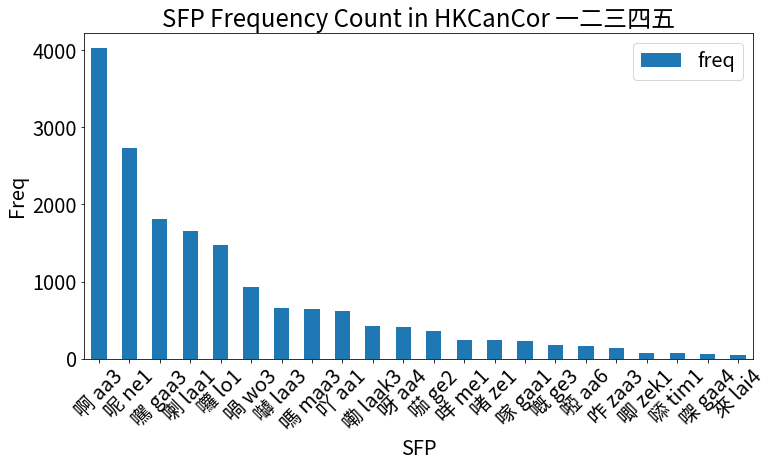

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 20
plt.rcParams['font.family']='Noto Sans CJK JP'

df = pd.DataFrame({'freq':sfp_dict}).sort_values(by=['freq'], ascending=False)
df[df.freq > 50].plot(kind='bar')
plt.xlabel("SFP")
plt.ylabel("Freq")
plt.xticks(rotation=45)
plt.title("SFP Frequency Count in HKCanCor")
plt.show()

## Exercise 2

Cantonese SFPs come in different tones. Here are some examples.

(Structure: 3.SG - Adverb/Modal - not here - SFP)
- 佢 肯定(certainly) 唔喺度 **啦 (laa1)**！
- 佢 應該(should be) 唔喺度 **𠿪 (gaa2)**？
- 佢 好似(seems) 唔喺度 **喎 (wo3)**。
- 佢 居然(unexpectedly) 唔喺度 **啝 (wo4)**？
- 佢 聽講(heard) 唔喺度 **𡁜 (wo5)**～

Which tones are more frequently used?

In [21]:
## Exercise 2

# Step 1: Set up a dictionary
sfp_dict_tone = collections.Counter()
for t in range(6): sfp_dict_tone[f'Tone {t+1}'] = 0

# Step 2: Loop through all_sfp, and update sfp_dict
for sfp in all_sfp:
  
  # Step 2.1: Remove bad jyutping
  if sfp.jyutping is None:
    continue

  # Step 2.2: Define the key, which takes jyutping as the unique way to 
  #           refer to an SFP

  ### Change this line below, so that the last character of the string will be 
  ### used as the key. 
  key = 'Tone ' + 'Tone Number of the SFP in question'
  sfp_dict_tone[key] += 1

# Step 3: Print out Tone collection
sfp_dict_tone.most_common()

[('Tone 3', 9005),
 ('Tone 1', 7352),
 ('Tone 4', 555),
 ('Tone 2', 416),
 ('Tone 6', 173),
 ('Tone 5', 33)]

## Exercise 2+ (Optional)
We can also extract a frequency list of SFPs by rhymes.
See the documentation for jyutping related functions [here](https://pycantonese.org/jyutping.html).

In [ ]:
## Exercise 2+

# Step 1: Set up a dictionary
sfp_dict_rhyme = collections.Counter()
for sfp in all_sfp:
  
  # Step 2.1: Remove bad jyutping
  if sfp.jyutping is None:
    continue

  # Step 2.2 Parse Jyutping
  parsed_jp = pycantonese.parse_jyutping(sfp.jyutping)
  if len(parsed_jp) > 1:
    continue

  # Step 2.3: Define the key, which takes jyutping as the unique way to 
  #           refer to an SFP

  ## Change this line below ##
  key = 'The rhyme'

  sfp_dict_rhyme[key] += 1

# Step 3: Print out Tone collection
sfp_dict_rhyme.most_common()

# Barchart

You can create a bar chart that shows the Frequency count by tones.
We are using the same libraries as above, i.e. matplotlib and pandas.

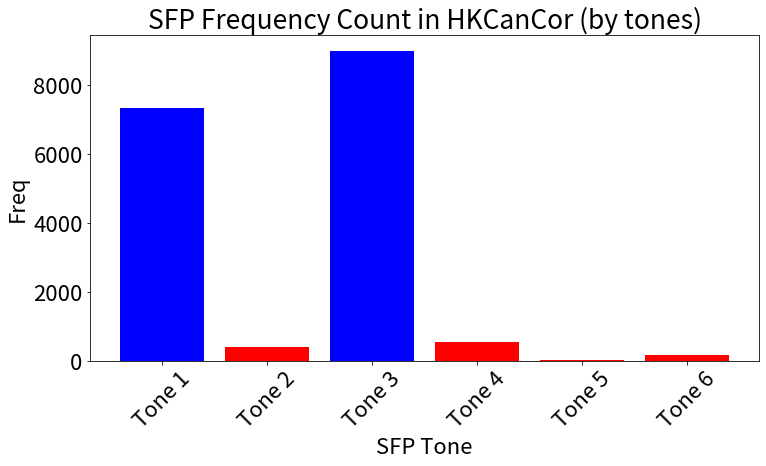

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 22

df2 = pd.DataFrame({'tone':sfp_dict_tone})
plt.xlabel("SFP Tone")
plt.ylabel("Freq")
plt.xticks(rotation=45)
plt.title("SFP Frequency Count in HKCanCor (by tones)")
plt.bar(sfp_dict_tone.keys(), sfp_dict_tone.values(), color=['blue','red','blue','red','red','red'])
# # To display the tones sequentially instead
# sorted_sfp_dict_tone = sorted(sfp_dict_tone.items())
# plt.bar([x for x,y in sorted_sfp_dict_tone], [y for x,y in sorted_sfp_dict_tone], color=['blue','red','blue','red','red','red'])
plt.show()

## Exercise 3

We can use the corpus to look at SFP examples. Let's extract all utterances with a Tone 5 SFP.

Recall that we can use `corpus1.search(by_utterances=True)` to extract all utterances from `corpus1`. We can add more parameters to the search function, so that only utterance that contains a word with a particular POS / Tone will be extracted.

See [this page](https://pycantonese.org/searches.html) for a full description.

Also add lines to print out these utterances in a nicer format, with or without Jyutping.

* *Without Jyutping*
```
0: 𠻺 吓 , 𠻺 吓 .
1: 𠻺 吓 , 𠻺 吓 .
2: 乜嘢 撕裂 𡁜 , 中文 叫做 .
3: 唔係 咓 .
4: 五千幾 蚊 包 - 佢 話 最 低 , 唔係 , 唔係 , 五千幾 囖 起 𡁜 .
...
```

* *With Jyutping*
```
0: 𠻺(aa6) 吓(haa5) ,(None) 𠻺(aa6) 吓(haa5) .(None)
1: 𠻺(aa6) 吓(haa5) ,(None) 𠻺(aa6) 吓(haa5) .(None)
2: 乜嘢(mat1je5) 撕裂(si1lit6) 𡁜(wo5) ,(None) 中文(zung1man2) 叫做(giu3zou6) .(None)
3: 唔係(m4hai6) 咓(aa5) .(None)
```

In [32]:
## Exercise 3

utterances_t5sfp = [] ### Change this line 

# Find out how many occurences there are.
print(len(utterances_t5sfp))

# Solution: Without Jyutping
for i, utt in enumerate(utterances_t5sfp):
  print (f'{i}: ' + ' '.join([f'{t.word}' for t in utt]))

# Solution: With Jyutping
for i, utt in enumerate(utterances_t5sfp):
  print (f'{i}: ' + ' '.join([f'{t.word}({t.jyutping})' for t in utt]))

33
0: 𠻺 吓 , 𠻺 吓 .
1: 𠻺 吓 , 𠻺 吓 .
2: 乜嘢 撕裂 𡁜 , 中文 叫做 .
3: 唔係 咓 .
4: 五千幾 蚊 包 - 佢 話 最 低 , 唔係 , 唔係 , 五千幾 囖 起 𡁜 .
5: 我 就 覺得 佢 好 - 好 奇怪 囖 , 寫 " 起 " 𡁜 .
6: 你 , 唔係 噉 講嘢 啞 ?
7: 冇嘢 啞 ?
8: 你 唔係 見 到 有 人 喺 街 𠝹手 咁 邪 啞 ?
9: 十七 號 咪 McManaman 咓 ?
10: 佢哋 總 有 啲 辦法 咓 - 即係 成 個 國家 一 張 飛 都 攞 唔 到 .
11: 嗰陣時 係 嗰啲 魚 舖 仔 幾 缸 魚 𡃉 啫 嗎 , 咓 .
12: 奇妙 哩 .
13: 扮蟹 咓 .
14: 唔係 𠻺 嘛 , 你 都 唔 - 應該 唔係 年紀 好 大 嘅 啫 照計 .
15: " Miss 我 隻 手 真係 唔 得 𡃉 哩 .
16: 即係 大家 都 係 喺度 𠻺 揾 唔 到 嘢 寫 , 亂 咁 aa5 寫 大 ○ 呢 .
17: 冇 嘢 講 咋 話 ?
18: 得 一 條 𡃉 咋 話 ?
19: 噉 我 收 道歉 信 嗰陣時 又 覺得 誒 , " 唉 - 算 喇 .
20: 北控 咓 , 失控 .
21: 好 嘢 , 夠 鐘 .
22: 唔係 係 嘛 ?
23: 嘩 ! 唔係 咓 ?
24: 噉 然之後 啊 , 佢 打 返去 Council 呢 , 跟住 同 - 同 陳生 佢哋 講 呢 , 跟住 話 我哋 兩 個 靚妹 𡁜 , 佢 話 揾 個 揾 啲 大 啲 嘅 來 𡁜 .
25: 噉 然之後 啊 , 佢 打 返去 Council 呢 , 跟住 同 - 同 陳生 佢哋 講 呢 , 跟住 話 我哋 兩 個 靚妹 𡁜 , 佢 話 揾 個 揾 啲 大 啲 嘅 來 𡁜 .
26: 佢 話 讀 pharmacy 𡁜 .
27: 噉 呢 佢 就 同 我 講 叫 我 - 佢 就 建議 我 剝 咗 去 , 噉 跟住 呢 , 褸尾 我 問 返 啲 同學 囖 , 佢 話 " 唔使 四 隻 一齊 剝 晒 咓 " , 跟住 我 都 覺得 , 係 喇 , 使 唔使 四 隻 一齊 剝 晒 啊 ?
28: 哦 , 你 嗰 班 噉 計 咓 .
29: 唔係 要 我 同 佢 慶祝 咓 ?
30: 佢 冇 捉 埋 嘉樂仔 

## Exercise 4

Now you want to restrict the utterances to those that are longer than 6 but under 15 tokens, that contain Tone 4 SFPs. Write a code snippet, and download the result as a text file.

The file will be available in the file menu on the left of the colab interface.

In [ ]:
## Exercise 4 ##

utt_tone4_sfp = corpus1.search(by_utterances=True) ### Fix this line

# Solution:

with open('length_6_to_15_tone4.txt', 'w') as writefile:
  ### Change the for loop to print the utterances to the file
  for utt in utt_tone4_sfp:
    ### Change True to an appropriate token length check
    if True: 
      ### Change the part after the equal sign to a better format if needed.
      the_line = str(utt)
      # print(''.join([t.word for t in utt])) # Use print statement to check
      
      # Write the line to the file
      writefile.write(the_line) 


In [ ]:
# To download the file we just created

from google.colab import files
files.download("/length_6_to_15_tone4.txt")

## Exercise 5 (SFP research ideas)

### e.g. Finding co-occuring adverbial and SFP pairs

#### Problem description
Adverbials and SFPs express similar meaning, and it has been proposed that adverbials and SFPs form a discontinuous structure. Can we programmatically extract all "adverbial-sfp" pairs?

#### Programmatic solution
- Let's assume that all adverbials have the part-of-speech tag 'D' or 'C', and all SFP has the pos 'Y'. 
- To reduce the problem, we will only extract Tone 5 SFPs. We can then obtain a frequency table of (Adv, Sfp). 

#### Data Visualisation
- This frequency table can then be sorted in the reverse order.
- The pattern can also be displayed using a heatmap.